# Task 4: To Explore Decision Tree Algorithm

In [23]:
# Importing the libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data=pd.read_csv("~/Desktop/Iris.csv")

## Data Preprocessing

In [25]:
data.drop(['Id'],axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [27]:
# Checking for null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [28]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualization

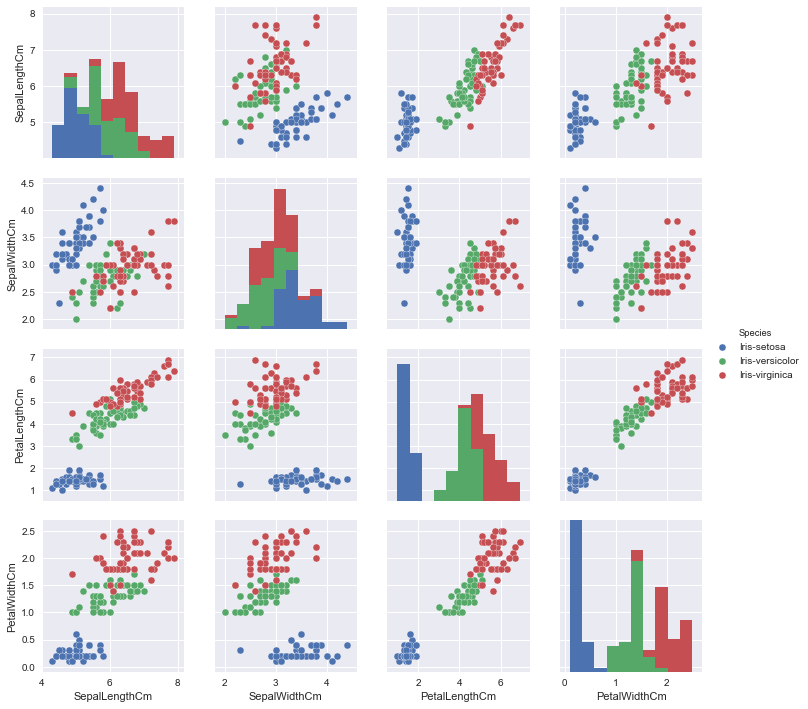

In [29]:
# Pairwise relation using Pairplot
sns.pairplot(data,hue='Species')
plt.style.use("bmh")
plt.show()

/Users/paras/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


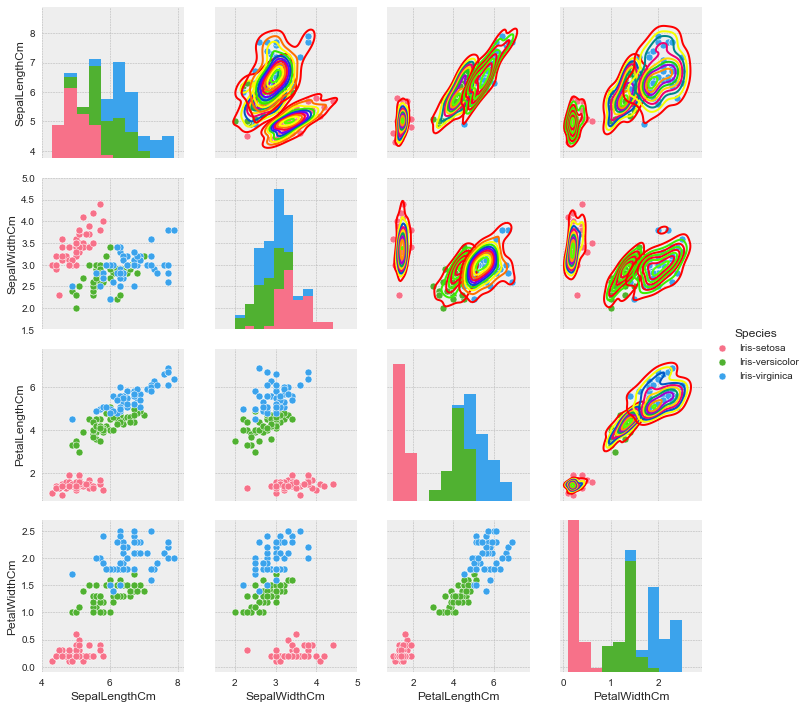

In [30]:
# visualizing relationship between each type of column variable
g=sns.pairplot(data,hue='Species',diag_kind='hist',palette="husl")
# Mapping a density plot to the upper triangle
g=g.map_upper(sns.kdeplot,cmap='prism')

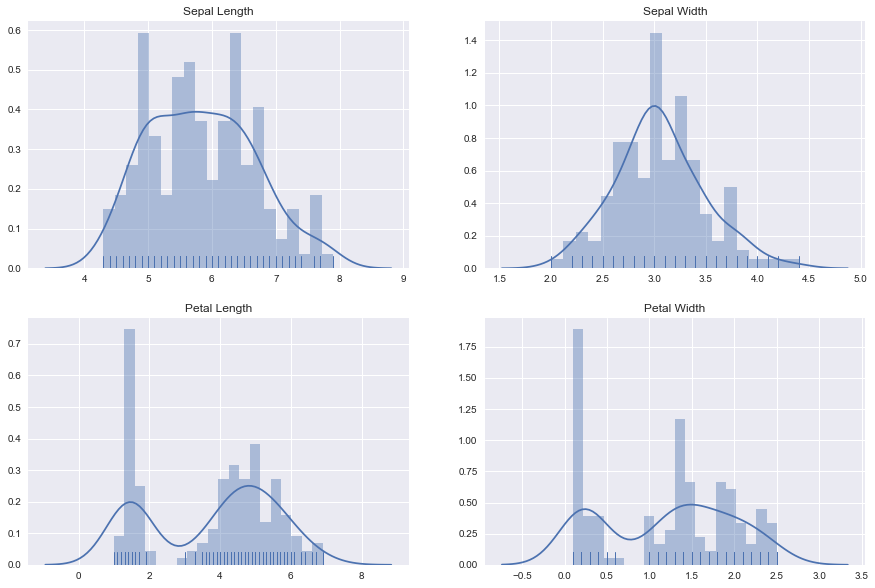

In [31]:
# Subplots
plt.figure(figsize=(15,10))
plt.style.use("seaborn")
plt.subplot(2,2,1)
sns.distplot(data['SepalLengthCm'].values,bins=20,kde=True,rug=True).set(title="Sepal Length")
plt.subplot(2,2,2)
sns.distplot(data['SepalWidthCm'].values,bins =20,kde=True,rug=True).set(title="Sepal Width")
plt.subplot(2,2,3)
sns.distplot(data['PetalLengthCm'].values,bins=20,kde=True,rug=True).set(title="Petal Length")
plt.subplot(2,2,4)
sns.distplot(data['PetalWidthCm'].values,bins=20,kde=True,rug=True).set(title="Petal Width")
plt.show()

## Model Training

In [32]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [33]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(y)

In [34]:
# Splitting the DataSet into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
y_pred=dt.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [37]:
# Classification Report
from sklearn.metrics import classification_report
c=classification_report(y_test,y_pred)
print(f"Classification report of the model is\n\n: {c}")

Classification report of the model is

:              precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30



In [38]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix of the model is: \n\n {cm}")

Confusion Matrix of the model is: 

 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [39]:
from sklearn import tree
tree.export_graphviz(dt,out_file='tree.dot',feature_names=data.columns[1:],filled=True,rounded=30,special_characters=True)

### convert dot file to png file using dot -Tpng tree.dot -o tree.png

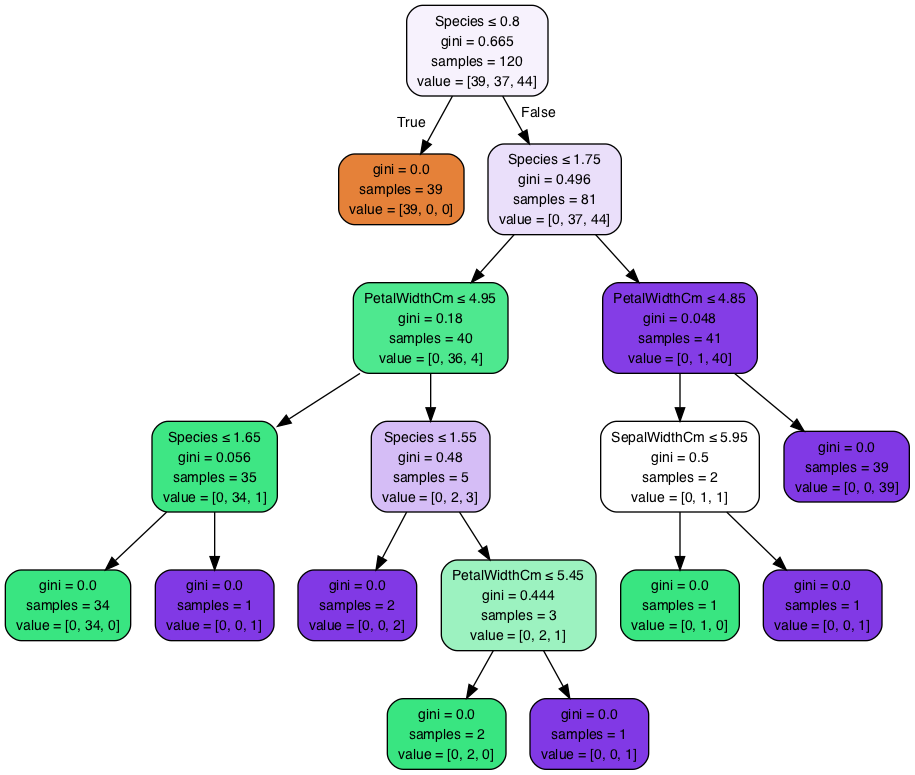

In [45]:
from IPython.display import Image
Image(filename="tree.png")